# 4장 로지스틱회귀분석

## 분류 문제 정의
> 이진 분류: 아웃풋이 Bool 값(참/거짓)

> 다중 클래스 분류: 아웃풋이 다중 값을 갖는 경우

In [5]:
%matplotlib inline

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

## 문제의 공식화: 이진 분류

> n_samples: 생성할 샘플의 수

> n_features: 각 샘플의 feature 수 / n_informative + n_redundant

> n_informative: 선형결정관계를 생성하는 데에 사용되는 feature의 수

> n_redundant: 선형결정관계를 생성하는 데에 사용되지 않는 feature의 수

> n_clusters_per_class: 각 클래스 당 클래스터의 수

> class_sep: 평균적인 거리, 높을 수록 클래스 간의 분류가 잘 이루어짐

In [7]:
X, y = make_classification(n_samples = 100,
                           n_features = 2,
                           n_informative = 2,
                           n_redundant = 0,
                           n_clusters_per_class = 1,
                           class_sep = 2.0,
                           random_state = 101)
X, y

#1. 2차원 공간에 2개의 정보적 특성을 가진 100개의 샘플을 생성
#2. 클래스 간의 평균적인 거리가 2.0이며 클래스 당 하나의 클러스터가 있는 분류 문제용 가상 데이터셋을 생성

(array([[-1.04910781,  2.85665467],
        [-0.95081668, -2.92962994],
        [-1.41723589, -2.39627051],
        [-2.92377584, -1.5567371 ],
        [-2.41728707,  1.4951089 ],
        [-3.40154264, -1.14982839],
        [-1.53659935, -2.28580115],
        [-1.96406213,  1.8664572 ],
        [-2.19070633,  1.65164572],
        [-1.31680513,  2.50444458],
        [-1.79105894,  2.26372183],
        [-2.28561844, -1.81814172],
        [-2.10327634, -2.04648481],
        [-1.18806127, -2.56253522],
        [-1.23117577, -2.43168205],
        [-1.99030787,  2.11046883],
        [-0.7761225 ,  3.36618615],
        [-2.87909083,  1.30763322],
        [-2.26359432,  1.67342039],
        [-0.69672613, -2.88672306],
        [-1.53984553,  2.86891725],
        [-2.87361456, -1.27402704],
        [-1.97189546, -1.93060566],
        [-1.92003663,  2.31224241],
        [-2.01864042, -1.89207083],
        [-1.97024612, -1.95093269],
        [-1.54635501, -2.66437846],
        [-1.44273586, -2.486

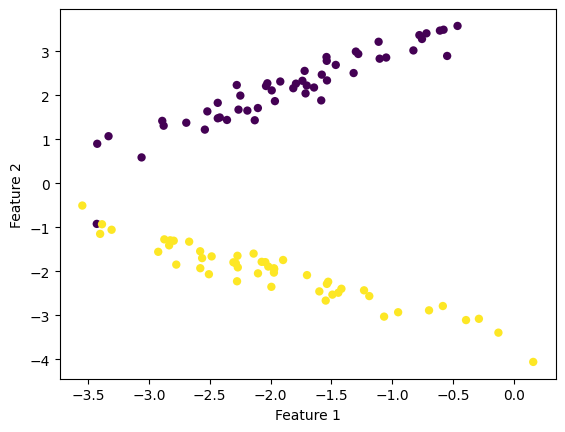

In [8]:
plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = y,
            linewidth = 0, edgecolor = None)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## 클래시파이어의 성능 평가 - 혼동행렬

In [9]:
y_orig = [0, 0, 0, 0, 0, 0, 1, 1, 1, 1]
y_pred = [0, 0, 0, 0, 1, 1, 1, 1, 1, 0]

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_orig, y_pred)

#1. 샘플의 수: 10개
#2. 원본 데이터 셋에서 0으로(1로) 분류된 샘플의 수: 6개(4개) / 행의 합계
#3. 예측 데이터 셋에서 0으로(1로) 분류된 샘플의 수: 5개(5개) / 열의 합계
#4. 올바르게 분류된(분류되지 않은) 샘플의 수: 7개(3개) / 대각원소(비대각원소)의 합계

array([[4, 2],
       [1, 3]])

### 히트맵: 혼동행렬을 그래픽으로 표현한 형태

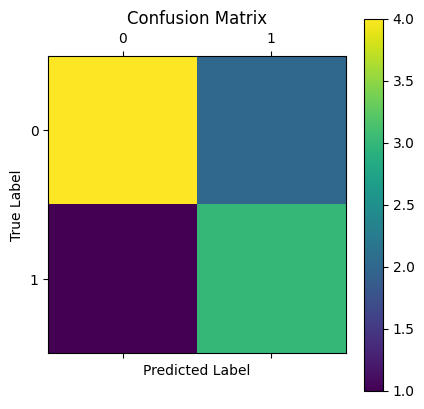

In [11]:
plt.matshow(confusion_matrix(y_orig, y_pred))
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### 정확도: 총 샘플 개수에 대한 정확한 분류의 백분율

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_orig, y_pred)

0.7

### 정밀도: 하나의 라벨에 대한 정확한 분류의 백분율

In [13]:
from sklearn.metrics import precision_score
precision_score(y_orig, y_pred)

0.6

### 재현율: 하나의 라벨에 대한 정확한 감지의 백분율

In [14]:
from sklearn.metrics import recall_score
recall_score(y_orig, y_pred)

0.75

### f1 score: 정밀도와 재현율의 조화평균

In [15]:
from sklearn.metrics import f1_score
f1_score(y_orig, y_pred)

0.6666666666666665

### 각 클래스에 대한 모든 점수를 계산하는 method

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_orig, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.60      0.75      0.67         4

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10



## 확률 기반 접근법 정의

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, \
y_test = train_test_split(X, y.astype(float), \
                          test_size = 0.33, random_state = 1234)

In [18]:
y_test.dtype

dtype('float64')

In [19]:
y_test

array([0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.])

In [20]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)
regr.predict(X_test)

array([ 0.24911764,  0.94480274,  1.04790767, -0.1098638 ,  0.87290165,
        0.75712674,  0.33164394,  1.05124376,  0.9824979 ,  1.21868515,
        1.03339797,  1.3545522 ,  0.12490736,  0.17187707,  0.28451906,
        0.82486431, -0.21587768,  1.13600811,  0.90196515,  0.02748433,
       -0.01239104,  0.78312112,  0.37006021, -0.08587363,  0.05538425,
       -0.23606721,  0.88881157,  0.06381301,  0.91510289, -0.01499934,
        0.2235076 , -0.06710638,  0.04796501])

### 시그모이드 함수

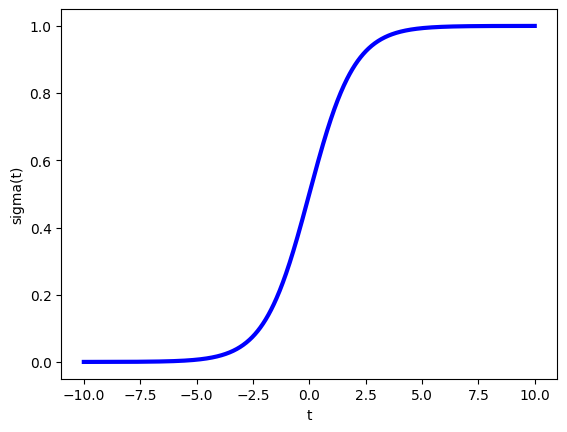

In [21]:
import numpy as np

def model(x):
  return 1 / (1 + np.exp(-x))

X_vals = np.linspace(-10, 10, 1000)
plt.plot(X_vals, model(X_vals), color = 'blue', linewidth = 3)
plt.ylabel('sigma(t)')
plt.xlabel('t')

plt.show()

### 몇 가지 코드 확인

In [22]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train.astype(int))
y_clf = clf.predict(X_test)

print(classification_report(y_test, y_clf))

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        19
         1.0       0.93      1.00      0.97        14

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



#### 클래시파이어의 결정 경계 확인

In [23]:
h = .02

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

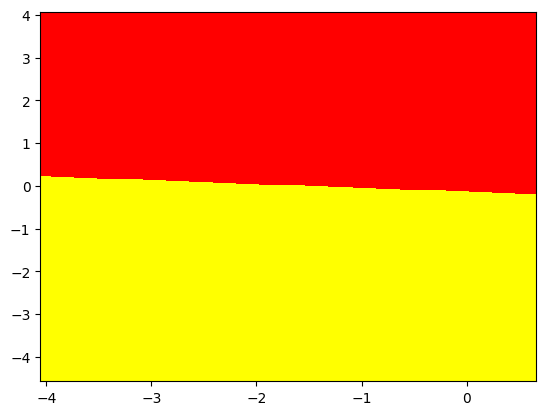

In [24]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.autumn)

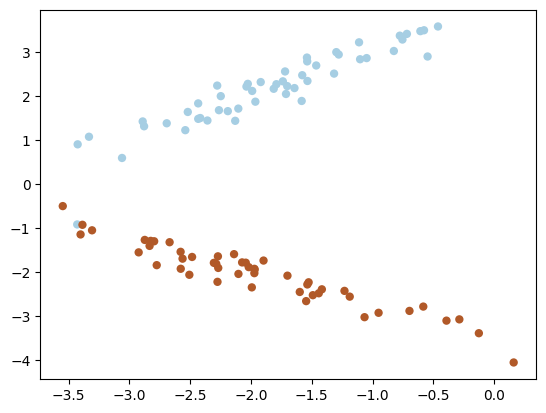

In [25]:
plt.scatter(X[:, 0], X[:, 1], c = y, edgecolors = 'k', linewidth = 0, cmap = plt.cm.Paired)

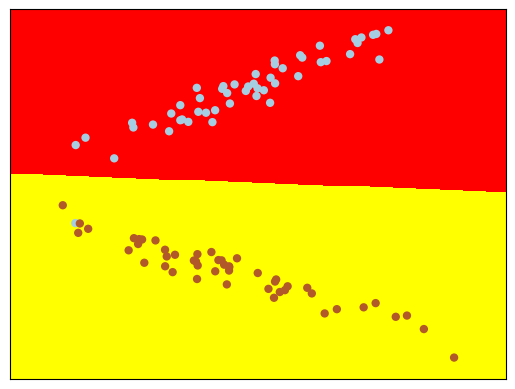

In [26]:
h = .02

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.autumn)

plt.scatter(X[:, 0], X[:, 1], c = y, edgecolors = 'k', linewidth = 0, cmap = plt.cm.Paired)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

#### 순수한 확률과 가중치 벡터 확인

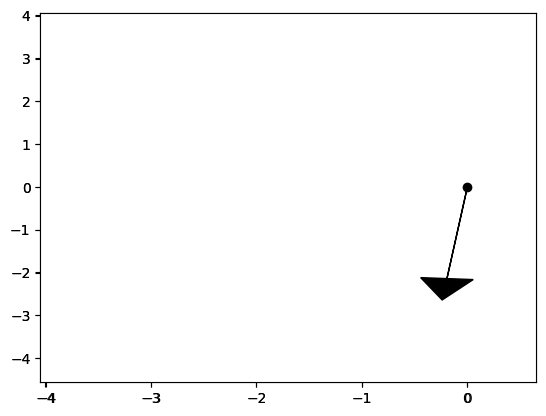

In [27]:
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.autumn)

ax = plt.axes()
ax.arrow(0, 0, clf.coef_[0][0], clf.coef_[0][1], head_width = 0.5,
         head_length = 0.5, fc = 'k', ec = 'k')
plt.scatter(0, 0, marker = 'o', c = 'k')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [28]:
#클래시파이어가 라벨을 훈련하고 예측하는 데 걸리는 시간 살펴보기

%timeit clf.fit(X, y)

7.97 ms ± 2.92 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [29]:
%timeit clf.predict(X)

128 µs ± 60.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [30]:
%timeit clf.predict_proba(X)

224 µs ± 52 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### 다중 클래스 로지스틱회귀

In [31]:
%reset -f

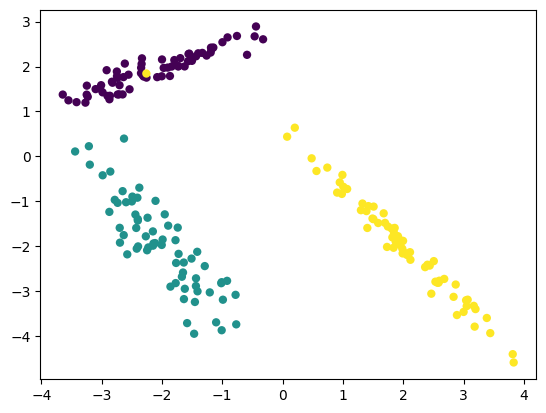

In [32]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 200, n_features = 2,
                           n_classes = 3, n_informative = 2,
                           n_redundant = 0, n_clusters_per_class = 1,
                           class_sep = 2.0, random_state = 101)

plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = y, linewidth = 0, edgecolor = None)
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y.astype(float), test_size = 0.33, random_state = 101)

In [34]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train.astype(int))
y_clf = clf.predict(X_test)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_clf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        24
         1.0       1.00      1.00      1.00        22
         2.0       1.00      1.00      1.00        20

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



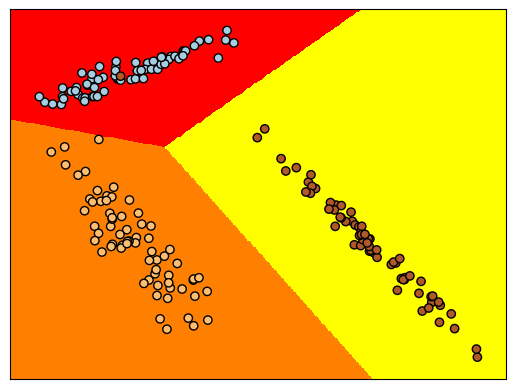

In [36]:
import numpy as np

#메시의 스텝 크기
h = .02

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

#결과를 색상으로 플롯
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.autumn)

#훈련 포인트들도 플롯
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [37]:
print(X_test[0])
print(y_test[0])
print(y_clf[0])

[-3.26744968  1.19639333]
0.0
0


In [38]:
clf.predict_proba(X_test[0].reshape(1, -1))

#reshape(1, -1) / 2차원으로 배열 재구성

array([[0.85126747, 0.13897348, 0.00975905]])

## 예제

In [39]:
X, y = make_classification(n_samples = 10000, n_features = 10,
                           n_informative = 10, n_redundant = 0,
                           random_state = 101)

### 1. statsmodel


*   모델 훈련시키기
*   모델을 훈련시킬 수 있었는지 또는 실패했는지 여부를 보여줌



In [40]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [41]:
Xc = sm.add_constant(X)
logistic_regression = sm.Logit(y, Xc)
fitted_model = logistic_regression.fit()

Optimization terminated successfully.
         Current function value: 0.438685
         Iterations 7


### summary 메소드

In [42]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Mon, 25 Mar 2024   Pseudo R-squ.:                  0.3671
Time:                        23:45:31   Log-Likelihood:                -4386.8
converged:                       True   LL-Null:                       -6931.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4299      0.039     11.023      0.000       0.353       0.506
x1             0.0671      0.015      4.410      0.000       0.037       0.097
x2            -0.7828      0.019    -41.947      0.000      -0.819      -0.746
x3             0.1221      0.016      7.815      0.000       0.091       0.153
x4             0.2841      0.016     18.150      0.000       0.253       0.315
x5             0.1469      0.014     10.283      0.000       0.119       0.175
x6            -0.3414      0.019    -17.636      0.000      -0.379      -0.303
x7             0.0503      0.014      3.481      0.000       0.022       0.079
x8            -0.1393      0.014     -9.642      0.000      -0.168      -0.111
x9             0.1127      0.014      7.931      0.000       0.085       0.141
x10           -0.4792      0.018    -27.340      0.000      -0.514      -0.445
==============================================================================
"""

### 모델 적합시키기

*   자동적으로 절편 항목이 모델에 추가



In [43]:
import pandas as pd

Xd = pd.DataFrame(X)
Xd.columns = ['VAR'+str(i+1) for i in range(10)]
Xd['response'] = y

logistic_regression = smf.logit(formula = 'response ~ VAR1 + VAR2 + VAR3 + VAR4 + \
VAR5+ VAR6 + VAR7 + VAR8 + VAR9 + VAR10', data = Xd)

fitted_model = logistic_regression.fit()
fitted_model.summary()

Optimization terminated successfully.
         Current function value: 0.438685
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               response   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Mon, 25 Mar 2024   Pseudo R-squ.:                  0.3671
Time:                        23:45:31   Log-Likelihood:                -4386.8
converged:                       True   LL-Null:                       -6931.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4299      0.039     11.023      0.000       0.353       0.506
VAR1           0.0671      0.015      4.410      0.000       0.037       0.097
VAR2          -0.7828      0.019    -41.947      0.000      -0.819      -0.746
VAR3           0.1221      0.016      7.815      0.000       0.091       0.153
VAR4           0.2841      0.016     18.150      0.000       0.253       0.315
VAR5           0.1469      0.014     10.283      0.000       0.119       0.175
VAR6          -0.3414      0.019    -17.636      0.000      -0.379      -0.303
VAR7           0.0503      0.014      3.481      0.000       0.022       0.079
VAR8          -0.1393      0.014     -9.642      0.000      -0.168      -0.111
VAR9           0.1127      0.014      7.931      0.000       0.085       0.141
VAR10         -0.4792      0.018    -27.340      0.000      -0.514      -0.445
==============================================================================
"""



> 확률 기울기 하강 공식 구현


*   선형회귀와 관련해서 가장 큰 차이점: 로지스틱(시그모이드) 손실 함수





# 5장 데이터 준비

In [46]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline
np.set_printoptions(precision = 5, suppress = True)

In [75]:
import pandas as pd
from sklearn.datasets import fetch_openml

boston = fetch_openml(data_id=506,parser='auto')
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target

observations = len(dataset)
variables = dataset.columns[:-1]

X = dataset.iloc[[-1]]
y = dataset['target']

In [48]:
yq = np.array(y>25, dtype = int)

## 평균 중심화

In [70]:
dataset.min()

<ipython-input-70-1cef71bc0321>:1: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.min()


Age                    22.0
Years_of_education      4.0
Sex_partners            0.0
Income                500.0
target                  0.0
dtype: float64

In [79]:
print('mean: %3f' % np.mean(y))

mean: 0.339623


## 로지스틱회귀 사례

In [89]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

standardization = StandardScaler()
Xq = sm.add_constant(standardization.fit_transform(X))
logit = sm.Logit(yq, Xq)
result = logit.fit()

print(result.summary())

ValueError: endog and exog matrices are different sizes

## 정성적 특성 인코딩

In [92]:
outlook = ['sunny', 'overcast', 'rainy']
temperature = ['hot', 'mild', 'cool']
humidity = ['high', 'normal']
windy = ['TRUE', 'FALSE']

weather_dataset = list()

for o in outlook:
  for t in temperature:
    for h in humidity:
      for w in windy:
        weather_dataset.append([o, t, h, w])

play = [0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1]

## pandas를 이용한 더미 코딩

In [110]:
import pandas as pd

df = pd.DataFrame(weather_dataset, columns = ['outlook', 'temperature', 'humidity', 'windy'])

In [111]:
print(pd.get_dummies(df.humidity).loc[:5, :])

#ix 대신 loc 사용

   high  normal
0     1       0
1     1       0
2     0       1
3     0       1
4     1       0
5     1       0


In [113]:
dummy_encoding = pd.get_dummies(df)

In [114]:
import statsmodels.api as sm
X = sm.add_constant(dummy_encoding)
logit = sm.Logit(play, X)
result = logit.fit()
print(result.summary())

         Current function value: 0.292346
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   36
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            6
Date:                Tue, 26 Mar 2024   Pseudo R-squ.:                  0.5744
Time:                        00:19:02   Log-Likelihood:                -10.524
converged:                      False   LL-Null:                       -24.731
Covariance Type:            nonrobust   LLR p-value:                 7.856e-05
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2393        nan        nan        nan         nan         nan
outlook_overcast     2.9833      6e+07   4.97e-

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [115]:
X.drop(['outlook_sunny', 'temperature_mild', 'humidity_normal', 'windy_FALSE'], inplace = True, axis = 1)
logit = sm.Logit(play, X)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.292346
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   36
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            6
Date:                Tue, 26 Mar 2024   Pseudo R-squ.:                  0.5744
Time:                        00:19:04   Log-Likelihood:                -10.524
converged:                       True   LL-Null:                       -24.731
Covariance Type:            nonrobust   LLR p-value:                 7.856e-05
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.4055      2.196      2.462      0.014       1.102       9.709
outlook_ove

## DictVectorizer와 one-hot encoding

In [120]:
from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse = False)
dict_representation = [{varname: var for var, varname in \
                        zip(row, ['outlook', 'temperature', 'humidity', 'windy'])} for row in weather_dataset]
print(dict_representation[0])
print(vectorizer.fit_transform(dict_representation))

{'outlook': 'sunny', 'temperature': 'hot', 'humidity': 'high', 'windy': 'TRUE'}
[[1. 0. 0. 0. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 1. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1. 1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 1. 0. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0. 1. 0. 1. 0.]
 [0. 1. 1. 0. 0. 0. 1. 0. 0. 1.]
 [0. 1. 1. 0. 0. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0. 0. 1. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0. 0. 0. 1. 0. 1.]
 [0. 1. 1. 0. 0. 0. 0. 1. 1. 0.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 1. 0. 0. 1. 0.]
 [0. 1. 1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 1. 0. 1. 

In [121]:
print(vectorizer.feature_names_)

['humidity=high', 'humidity=normal', 'outlook=overcast', 'outlook=rainy', 'outlook=sunny', 'temperature=cool', 'temperature=hot', 'temperature=mild', 'windy=FALSE', 'windy=TRUE']


In [123]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
label_encoder = LabelEncoder()
print(label_encoder.fit_transform(df.outlook))

[2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [125]:
label_encoder.inverse_transform([0, 1, 2])

array(['overcast', 'rainy', 'sunny'], dtype=object)

In [126]:
print(label_encoder.classes_)

['overcast' 'rainy' 'sunny']


In [127]:
label_binarizer = LabelBinarizer(neg_label = 0, pos_label = 1,
                                 sparse_output = False)
print(label_binarizer.fit_transform(
    label_encoder.fit_transform(df.outlook)))

[[0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]]


## 특정 해셔

In [129]:
your_text = 'Nomina sunt consequentia rerum'
mapping_words_in_text = {word: position for position, word in enumerate(set(your_text.lower().split(' ')))}
mapping_words_in_text

{'nomina': 0, 'rerum': 1, 'sunt': 2, 'consequentia': 3}

In [142]:
corpus = ['The quick fox jumped over the lazy dog',
          'I sought a dog wondering around with a bird',
          'My dog is names Fido']

from sklearn.feature_extraction.text import CountVectorizer
textual_one_hot_encoder = CountVectorizer(binary = True)
textual_one_hot_encoder.fit(corpus)

vectorized_text = textual_one_hot_encoder.transform(corpus)
vectorized_text.todense()

matrix([[0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1],
        [0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]])

In [146]:
print(textual_one_hot_encoder.get_feature_names_out())

['around' 'bird' 'dog' 'fido' 'fox' 'is' 'jumped' 'lazy' 'my' 'names'
 'over' 'quick' 'sought' 'the' 'with' 'wondering']


In [148]:
print(textual_one_hot_encoder.transform(['John wend home today']).todense())

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [153]:
from sklearn.feature_extraction.text import HashingVectorizer
hashing_trick = HashingVectorizer(n_features = 11, binary = True, norm = None)
M = hashing_trick.transform(corpus)
M.todense()

matrix([[1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.]])

In [155]:
print(hashing_trick.transform(['John is the owner of that dog']).todense())

[[1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0.]]


## 누락 데이터

In [162]:
import numpy as np
example = np.array([1, 2, np.nan, 4, 5])
example

array([ 1.,  2., nan,  4.,  5.])

In [164]:
np.isnan(example)

array([False, False,  True, False, False])

In [166]:
np.nan_to_num(example)

array([1., 2., 0., 4., 5.])

In [168]:
missing = np.isnan(example)
replacing_value = np.mean(example[~missing])
example[missing] = replacing_value
example

array([1., 2., 3., 4., 5.])